In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
alz = pd.read_csv("/content/data.csv")

In [3]:
alz.head(5)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [4]:
alz.shape

(174, 452)

In [5]:
alz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [6]:
alz.select_dtypes(include = "object").columns.tolist()

['ID', 'class']

In [7]:
alz.isna().sum()

,0
ID,0
air_time1,0
disp_index1,0
gmrt_in_air1,0
gmrt_on_paper1,0
...,...
paper_time25,0
pressure_mean25,0
pressure_var25,0
total_time25,0


In [8]:
alz = alz.drop("ID", axis = 1)
alz.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [9]:
alz["class"] = alz["class"].replace({'P': 1, 'H': 0})
alz["class"]

/tmp/ipython-input-1969841345.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  alz["class"] = alz["class"].replace({'P': 1, 'H': 0})


,class
0,1
1,1
2,1
3,1
4,1
...,...
169,0
170,0
171,0
172,0


In [10]:
from sklearn.model_selection import train_test_split

X = alz.drop(columns=["class"])
y = alz["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [30]:
print("Number of features:", X.shape[1])

Number of features: 450


In [19]:
X.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [22]:
y.head(450)

,class
0,1
1,1
2,1
3,1
4,1
...,...
169,0
170,0
171,0
172,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

# Creating random forest pipeline with scaled data
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state = 42, max_samples = 0.6, min_samples_leaf = 2))
])

# Fitting pipeline
pipe.fit(X_train, y_train)

# Predicting target values
y_pred = pipe.predict(X_test)

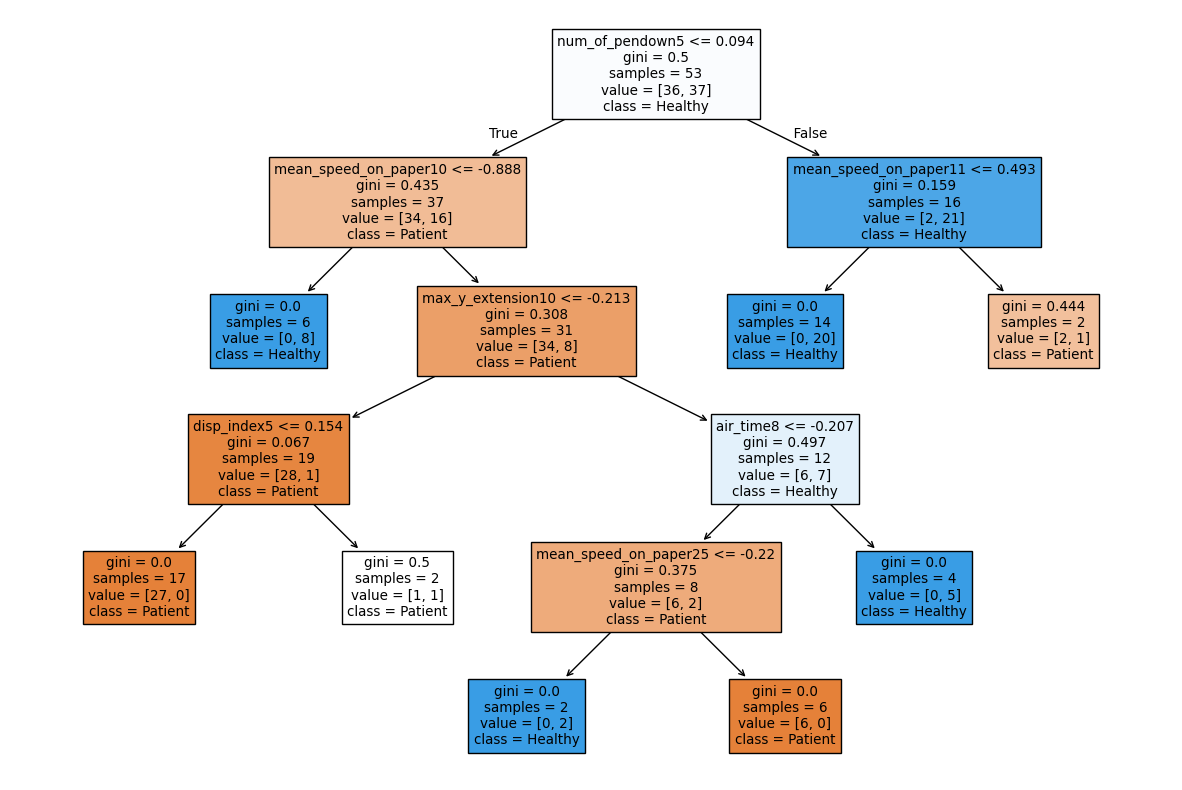

In [12]:
tree_viz = pipe.named_steps['classifier'].estimators_[0]

fig, ax = plt.subplots(figsize = (15, 10))

plot_tree(tree_viz, feature_names = alz.columns.tolist(), class_names = ["Patient", "Healthy"], filled = True)

plt.show()

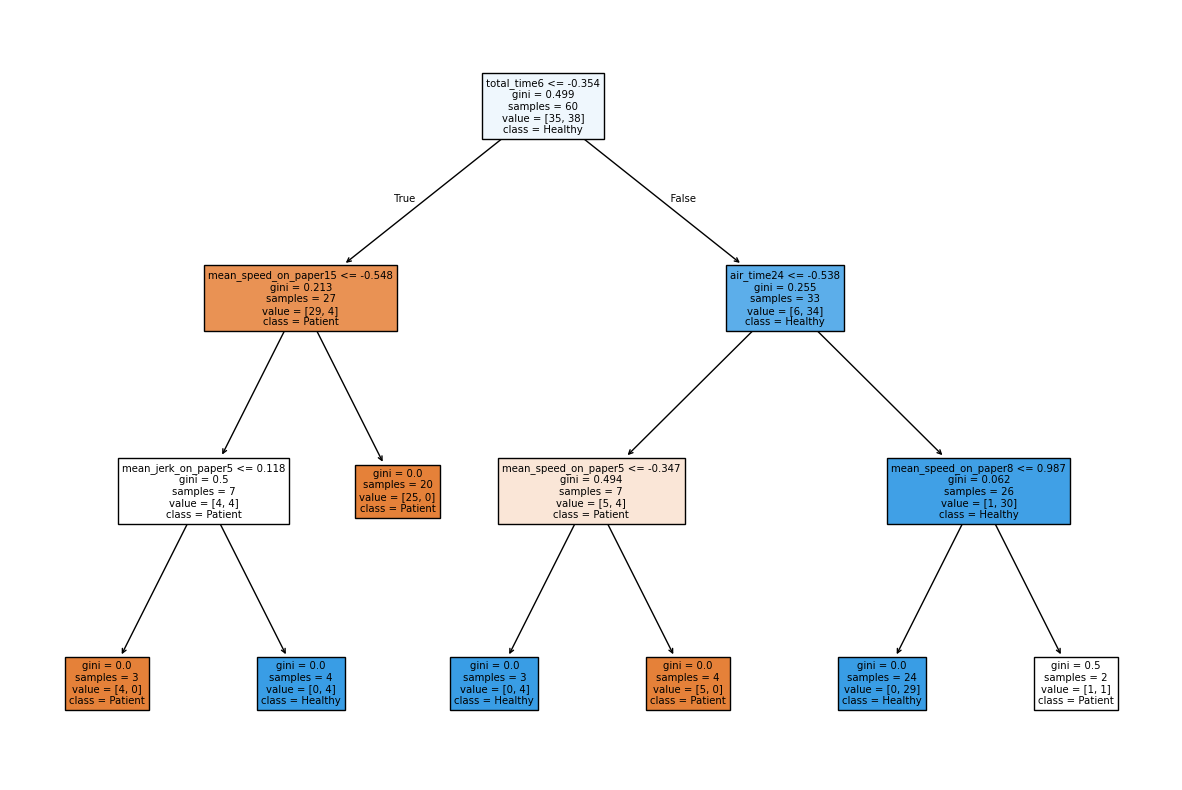

In [13]:
tree_viz = pipe.named_steps['classifier'].estimators_[49]

fig, ax = plt.subplots(figsize = (15, 10))

plot_tree(tree_viz, feature_names = alz.columns.tolist(), class_names = ["Patient", "Healthy"], filled = True)

plt.show()

In [31]:
# Save feature names for Flask app
joblib.dump(X.columns.tolist(), "feature_names.joblib")

['feature_names.joblib']

In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9019607843137255


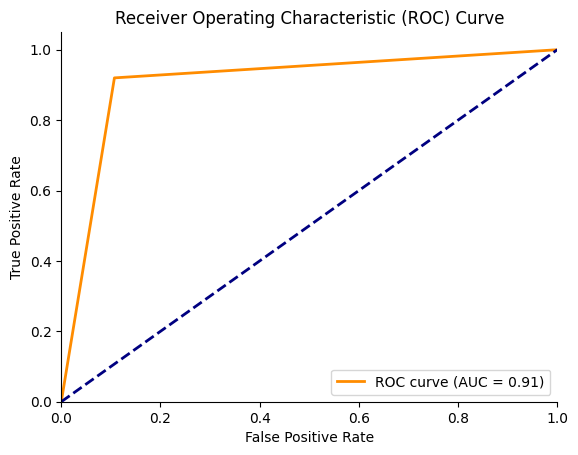

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots()

ax.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(auc))
ax.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc = "lower right")

sns.despine()

plt.show()

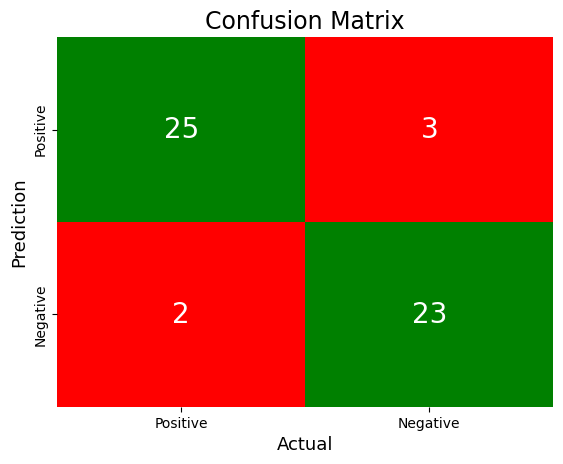

In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()

sns.heatmap(conf_matrix,
            annot = True,
            fmt = 'g',
            xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive', 'Negative'],
            cmap = ["Red", "Green", "Red", "Green"],
            cbar = False,
            annot_kws = {"size": 20},
            ax = ax)

ax.set_title('Confusion Matrix', fontsize = 17)
ax.set_ylabel('Prediction', fontsize = 13)
ax.set_xlabel('Actual', fontsize = 13)

plt.show()

In [17]:
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = (TP) / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.9056603773584906
Precision: 0.8846153846153846
Sensitivity: 0.92
Specificity: 0.8928571428571429


In [18]:
import joblib

joblib.dump(pipe, "alzheimers_random_forest_pipeline.joblib")

['alzheimers_random_forest_pipeline.joblib']

In [26]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.5 MB/s eta 0:00:00
